In [38]:
import h2o
from h2o.estimators.xgboost import H2OXGBoostEstimator #H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [39]:
#h2o.shutdown()

In [40]:
h2o.init(ip="localhost", port=54321)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_201"; Java(TM) SE Runtime Environment (build 1.8.0_201-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpd5iwa_4q
  JVM stdout: /tmp/tmpd5iwa_4q/h2o_mike_started_from_python.out
  JVM stderr: /tmp/tmpd5iwa_4q/h2o_mike_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.1.1
H2O cluster version age:,1 month
H2O cluster name:,H2O_from_python_mike_zr1hkw
H2O cluster total nodes:,1
H2O cluster free memory:,13.97 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [41]:
train = h2o.import_file("train.csv")
train

Parse progress: |█████████████████████████████████████████████████████████| 100%


attended_clean,interview_date_mo,client_name_clean,industry_clean,location_clean,position_to_be_closed_clean,gender_clean,current_location_clean,job_location_clean,interview_venue_clean,marital_clean,interview_type_clean,candidate_native_location_clean,skillset_clean,q_start_time_clean,q_unsch_mtgs_clean,q_call_3hrs_clean,q_alt_number_clean,q_resume_clean,q_venue_clean,q_call_letter_clean,q_total,name,fold,interview_date_mo_te,industry_clean_te,location_clean_te,position_to_be_closed_clean_te,gender_clean_te,current_location_clean_te,job_location_clean_te,interview_venue_clean_te,marital_clean_te,interview_type_clean_te,candidate_native_location_clean_te,skillset_clean_te,q_start_time_clean_te,q_unsch_mtgs_clean_te,q_call_3hrs_clean_te,q_alt_number_clean_te,q_resume_clean_te,q_venue_clean_te,q_call_letter_clean_te,q_total_te
0,2,HOSPIRA,PHARMACEUTICALS,CHENNAI,NICHE,MALE,CHENNAI,BANGALORE,OTHER,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,1,1,1,1,1,1,1,7,Candidate 2,2,0.582116,0.572553,0.600293,0.664445,0.640635,0.600293,0.698866,0.764651,0.658907,0.637438,0.68439,0.680327,0.714402,0.696791,0.684997,0.700882,0.700687,0.697808,0.698484,0.725309
0,2,HOSPIRA,PHARMACEUTICALS,CHENNAI,NICHE,MALE,CHENNAI,BANGALORE,OTHER,MARRIED,SCHEDULED_WALKIN,CHENNAI,OTHER,1,1,1,0,1,1,1,6,Candidate 5,1,0.413331,0.607185,0.601626,0.731784,0.638566,0.601626,0.682921,0.764651,0.629567,0.609618,0.590276,0.652955,0.713908,0.706164,0.701182,0.39953,0.704964,0.705565,0.710305,0.495421
0,6,OTHER,OTHER,BANGALORE,NICHE,MALE,BANGALORE,BANGALORE,BANGALORE,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,0,1,1,1,1,1,0,5,Candidate 21,2,0.658678,0.693536,0.701156,0.662421,0.63861,0.701156,0.696842,0.702627,0.656882,0.635414,0.682365,0.678302,0.426677,0.694767,0.682972,0.698857,0.698662,0.695784,0.450903,0.315127
0,6,OTHER,OTHER,BANGALORE,NICHE,MALE,BANGALORE,BANGALORE,BANGALORE,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,1,1,1,0,0,1,1,5,Candidate 25,0,0.680989,0.71346,0.660763,0.685432,0.64445,0.660763,0.6542,0.667099,0.660141,0.646412,0.680724,0.66729,0.746717,0.728096,0.718179,0.416006,0.40586,0.726861,0.739062,0.231978
0,6,OTHER,OTHER,BANGALORE,NICHE,MALE,BANGALORE,BANGALORE,BANGALORE,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,0,0,1,1,1,1,0,4,Candidate 26,1,0.664661,0.697816,0.674568,0.728297,0.635078,0.674568,0.679433,0.682256,0.633094,0.606131,0.6586,0.649468,0.374484,0.382004,0.697695,0.701745,0.701477,0.702078,0.383825,0.636859
0,6,OTHER,OTHER,BANGALORE,NICHE,MALE,BANGALORE,BANGALORE,BANGALORE,MARRIED,SCHEDULED_WALKIN,BANGALORE,OTHER,0,1,1,1,1,1,0,5,Candidate 27,2,0.654235,0.689093,0.696713,0.657977,0.634167,0.696713,0.692399,0.698184,0.599081,0.630971,0.706517,0.673859,0.422234,0.690323,0.678529,0.694414,0.694219,0.69134,0.44646,0.310684
0,6,OTHER,OTHER,BANGALORE,NICHE,MALE,BANGALORE,BANGALORE,BANGALORE,SINGLE,SCHEDULED_WALKIN,BANGALORE,OTHER,0,1,1,1,0,1,0,4,Candidate 28,1,0.664843,0.697998,0.67475,0.728479,0.635261,0.67475,0.679615,0.682438,0.633276,0.606313,0.706401,0.64965,0.374666,0.702859,0.697877,0.701928,0.390717,0.70226,0.384007,0.636859
0,6,STANDARD CHARTERED BANK,BFSI,CHENNAI,NICHE,FEMALE,CHENNAI,CHENNAI,CHENNAI,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,1,1,1,0,1,1,0,5,Candidate 32,2,0.653541,0.636799,0.593132,0.657284,0.62559,0.593132,0.596579,0.596536,0.651746,0.630277,0.677229,0.673166,0.707241,0.68963,0.677836,0.443436,0.693526,0.690647,0.445766,0.30999
0,6,STANDARD CHARTERED BANK,BFSI,CHENNAI,NICHE,MALE,CHENNAI,CHENNAI,CHENNAI,MARRIED,SCHEDULED_WALKIN,CHENNAI,OTHER,1,1,1,1,1,1,1,7,Candidate 34,0,0.666029,0.639754,0.606447,0.670472,0.62949,0.606447,0.612108,0.607777,0.610181,0.631452,0.587779,0.65233,0.731758,0.713137,0.703219,0.714796,0.714094,0.711901,0.724103,0.751359
0,6,STANDARD CHARTERED BANK,BFSI,CHENNAI,NICHE,MALE,CHENNAI,CHENNAI,CHENNAI,MARRIED,SCHEDULED_WALKIN,CHENNAI,OTHER,1,1,1,0,1,0,1,5,Candidate 35,1,0.681182,0.644447,0.61466,0.744818,0.6516,0.61466,0.620789,0.616343,0.642601,0.622652,0.60331,0.665989,0.726942,0.719198,0.714216,0.412564,0.717998,0.402821,0.723339,0.1959

In [42]:
test = h2o.import_file("test.csv")
test

Parse progress: |█████████████████████████████████████████████████████████| 100%


attended_clean,interview_date_mo,client_name_clean,industry_clean,location_clean,position_to_be_closed_clean,gender_clean,current_location_clean,job_location_clean,interview_venue_clean,marital_clean,interview_type_clean,candidate_native_location_clean,skillset_clean,q_start_time_clean,q_unsch_mtgs_clean,q_call_3hrs_clean,q_alt_number_clean,q_resume_clean,q_venue_clean,q_call_letter_clean,q_total,name,interview_date_mo_te,industry_clean_te,location_clean_te,position_to_be_closed_clean_te,gender_clean_te,current_location_clean_te,job_location_clean_te,interview_venue_clean_te,marital_clean_te,interview_type_clean_te,candidate_native_location_clean_te,skillset_clean_te,q_start_time_clean_te,q_unsch_mtgs_clean_te,q_call_3hrs_clean_te,q_alt_number_clean_te,q_resume_clean_te,q_venue_clean_te,q_call_letter_clean_te,q_total_te
0,2,HOSPIRA,PHARMACEUTICALS,CHENNAI,NICHE,MALE,CHENNAI,OTHER,OTHER,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,1,1,1,1,1,1,1,7,Candidate 1,0.522936,0.577236,0.604502,0.691824,0.637978,0.604502,0.843137,0.771429,0.648601,0.62766,0.672414,0.663636,0.721649,0.707143,0.6983,0.708696,0.708333,0.706897,0.712627,0.735791
0,2,HOSPIRA,PHARMACEUTICALS,CHENNAI,NICHE,MALE,CHENNAI,CHENNAI,OTHER,SINGLE,SCHEDULED_WALKIN,CHENNAI,OTHER,0,0,0,0,0,0,0,0,Candidate 3,0.522936,0.577236,0.604502,0.691824,0.637978,0.604502,0.60961,0.771429,0.648601,0.62766,0.585586,0.663636,0.394958,0.410138,0.43128,0.418502,0.411765,0.41629,0.407895,0.432039
0,2,HOSPIRA,PHARMACEUTICALS,CHENNAI,NICHE,MALE,CHENNAI,CHENNAI,OTHER,SINGLE,SCHEDULED_WALKIN,CHENNAI,OTHER,1,1,0,1,0,1,1,5,Candidate 4,0.522936,0.577236,0.604502,0.691824,0.637978,0.604502,0.60961,0.771429,0.648601,0.62766,0.585586,0.663636,0.721649,0.707143,0.43128,0.708696,0.411765,0.706897,0.712627,0.24
0,6,OTHER,OTHER,BANGALORE,NICHE,FEMALE,BANGALORE,BANGALORE,BANGALORE,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,0,1,0,0,1,1,1,4,Candidate 12,0.666667,0.7,0.676991,0.691824,0.632432,0.676991,0.675,0.682243,0.648601,0.62766,0.672414,0.663636,0.394958,0.707143,0.43128,0.418502,0.708333,0.706897,0.712627,0
0,6,OTHER,OTHER,BANGALORE,NICHE,FEMALE,BANGALORE,BANGALORE,BANGALORE,SINGLE,SCHEDULED_WALKIN,BANGALORE,OTHER,0,1,1,0,1,1,1,5,Candidate 18,0.666667,0.7,0.676991,0.691824,0.632432,0.676991,0.675,0.682243,0.648601,0.62766,0.702479,0.663636,0.394958,0.707143,0.6983,0.418502,0.708333,0.706897,0.712627,0.24
0,6,STANDARD CHARTERED BANK,BFSI,CHENNAI,ROUTINE,MALE,CHENNAI,CHENNAI,CHENNAI,MARRIED,SCHEDULED_WALKIN,CHENNAI,ORACLE,1,1,1,1,1,1,0,6,Candidate 85,0.666667,0.640056,0.604502,0.62533,0.637978,0.604502,0.60961,0.606635,0.617391,0.62766,0.585586,0.62,0.721649,0.707143,0.6983,0.708696,0.708333,0.706897,0.407895,0.434783
0,6,STANDARD CHARTERED BANK,BFSI,CHENNAI,ROUTINE,MALE,CHENNAI,CHENNAI,CHENNAI,SINGLE,SCHEDULED_WALKIN,CHENNAI,ORACLE,0,1,1,0,1,1,1,5,Candidate 87,0.666667,0.640056,0.604502,0.62533,0.637978,0.604502,0.60961,0.606635,0.648601,0.62766,0.585586,0.62,0.394958,0.707143,0.6983,0.418502,0.708333,0.706897,0.712627,0.24
0,5,STANDARD CHARTERED BANK,BFSI,CHENNAI,ROUTINE,MALE,CHENNAI,CHENNAI,CHENNAI,SINGLE,SCHEDULED_WALKIN,HYDERABAD,ACCOUNTING,1,1,1,1,1,1,1,7,Candidate 93,0.74026,0.640056,0.604502,0.62533,0.637978,0.604502,0.60961,0.606635,0.648601,0.62766,0.691667,0.662162,0.721649,0.707143,0.6983,0.708696,0.708333,0.706897,0.712627,0.735791
0,5,STANDARD CHARTERED BANK,BFSI,CHENNAI,ROUTINE,MALE,CHENNAI,CHENNAI,CHENNAI,MARRIED,SCHEDULED_WALKIN,CHENNAI,ACCOUNTING,1,1,1,1,1,1,1,7,Candidate 96,0.74026,0.640056,0.604502,0.62533,0.637978,0.604502,0.60961,0.606635,0.617391,0.62766,0.585586,0.662162,0.721649,0.707143,0.6983,0.708696,0.708333,0.706897,0.712627,0.735791
0,5,STANDARD CHARTERED BANK,BFSI,CHENNAI,ROUTINE,MALE,CHENNAI,CHENNAI,CHENNAI,MARRIED,SCHEDULED_WALKIN,HYDERABAD,ACCOUNTING,1,1,1,1,1,1,1,7,Candidate 97,0.74026,0.640056,0.604502,0.62533,0.637978,0.604502,0.60961,0.606635,0.617391,0.62766,0.691667,0.662162,0.721649,0.707143,0.6983,0.708696,0.708333,0.706897,0.712627,0.735791


In [43]:
target_encode_features = [
    'interview_date_mo',
    #'client_name_clean',
    'industry_clean',
    'location_clean',
    'position_to_be_closed_clean',
    'gender_clean',
    'current_location_clean',
    'job_location_clean',
    'interview_venue_clean',
    'marital_clean',
    'interview_type_clean',
    'candidate_native_location_clean',
    'skillset_clean',
    'q_start_time_clean',
    'q_unsch_mtgs_clean',
    'q_call_3hrs_clean',
    'q_alt_number_clean',
    'q_resume_clean',
    'q_venue_clean',
    'q_call_letter_clean',
    'q_total',
]

for f in target_encode_features:
    train[f] = train[f].asfactor()
    test[f] = test[f].asfactor()
    
response_col_name = 'attended_clean'
train[response_col_name] = train[response_col_name].asfactor()
test[response_col_name] = test[response_col_name].asfactor()



In [44]:
xgb_grid_orig = H2OGridSearch(model=H2OXGBoostEstimator,
                          grid_id='xgboost_grid_orig',
                          hyper_params={
                            'fold_column': 'fold',
                            "ntrees" : [30, 50, 100],
                            "max_depth" : [2, 3, 4],  # [2, 5, 10],
                            "learn_rate" : [0.02, 0.1, 0.3],
                            "col_sample_rate" : [0.5, 0.8, 1.0]
                          })

x_ = ['fold'] + target_encode_features  #['%s_te' % c for c in target_encode_features]

xgb_grid_orig.train(x=x_, y=response_col_name,
                     training_frame=train, #validation_frame=valid,
                     seed=1)

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


In [45]:
gbm_gridperf_orig_auc = xgb_grid_orig.get_grid(sort_by='auc', decreasing=True)
#gbm_gridperf_orig_auc  # shows everything in performance object
gbm_gridperf_orig_auc

      col_sample_rate fold_column learn_rate max_depth ntrees  \
0                 0.8        fold        0.1         2     30   
1                 1.0        fold       0.02         2    100   
2                 0.5        fold        0.1         2     30   
3                 1.0        fold        0.1         2     30   
4                 0.8        fold       0.02         2    100   
.. ..             ...         ...        ...       ...    ...   
76                1.0        fold        0.3         3    100   
77                0.8        fold        0.3         3    100   
78                0.5        fold        0.3         4    100   
79                1.0        fold        0.3         4    100   
80                0.8        fold        0.3         4    100   

                     model_ids                 auc  
0    xgboost_grid_orig_model_5  0.7035228721872557  
1   xgboost_grid_orig_model_57  0.7010983586326052  
2    xgboost_grid_orig_model_4  0.7010880743757456  
3    xg

In [46]:
best_xgb_model_orig = gbm_gridperf_orig_auc.models[0]
best_xgb_model_orig.varimp(True)[:5]

,variable,relative_importance,scaled_importance,percentage
0,q_total.7,414.147369,1.000000,0.502149
1,interview_type_clean.SCHEDULED,97.824089,0.236206,0.118611
2,q_start_time_clean.0,62.628181,0.151222,0.075936
3,interview_date_mo.3,50.297958,0.121449,0.060986
4,candidate_native_location_clean.CHENNAI,36.780033,0.088809,0.044595


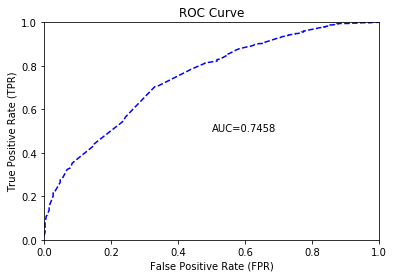

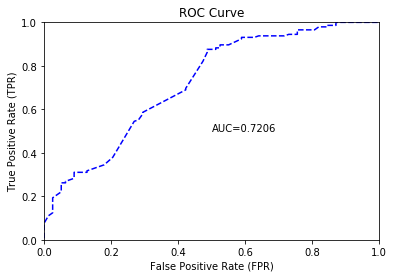

In [47]:
best_xgb_orig_perf_train = best_xgb_model_orig.model_performance(train)
best_xgb_orig_perf = best_xgb_model_orig.model_performance(test)
best_xgb_orig_perf_train.plot()
best_xgb_orig_perf.plot()


In [48]:
print('Accuracy(Train/Test):', best_xgb_orig_perf_train.accuracy()[0][0], '/', best_xgb_orig_perf.accuracy()[0][0])
print('AUC(Train/Test):', best_xgb_orig_perf_train.auc(), '/', best_xgb_orig_perf.auc())

Accuracy(Train/Test): 0.4706895351409912 / 0.5172345638275146
AUC(Train/Test): 0.7457783125591344 / 0.7206012378426171


In [49]:
best_xgb_orig_perf.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4639246165752411: 


,,0,1,Error,Rate
0,0,32.0,46.0,0.5897,(46.0/78.0)
1,1,10.0,135.0,0.069,(10.0/145.0)
2,Total,42.0,181.0,0.2511,(56.0/223.0)


In [50]:
# save the model
best_xgb_orig_model_path = h2o.save_model(model=best_xgb_model_orig, path="./tmp/saved_model", force=True)
print(best_xgb_orig_model_path)

/home/mike/Repos/CaseStudies/GoHealth/tmp/saved_model/xgboost_grid_orig_model_5


In [51]:
xgb_grid_te = H2OGridSearch(model=H2OXGBoostEstimator,
                          grid_id='xgboost_grid_te',
                          hyper_params={
                            'fold_column': 'fold',
                            "ntrees" : [30, 50, 100],
                            "max_depth" : [2, 3, 4],  # [2, 5, 10],
                            "learn_rate" : [0.02, 0.1, 0.3],
                            #"sample_rate" : [0.8, 1.0],
                            "col_sample_rate" : [0.5, 0.8, 1.0]
                          })

x_ = ['fold'] + ['%s_te' % c for c in target_encode_features]

xgb_grid_te.train(x=x_, y=response_col_name,
                     training_frame=train, #validation_frame=valid,
                     seed=1)

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


In [ ]:
xgb_gridperf_te_auc = xgb_grid_te.get_grid(sort_by='auc', decreasing=True)
xgb_gridperf_te_auc

In [53]:
best_xgb_model_te = xgb_gridperf_te_auc.models[0]
best_xgb_model_te.varimp(True)[:5]

,variable,relative_importance,scaled_importance,percentage
0,q_total_te,878.894470,1.000000,0.322644
1,q_start_time_clean_te,496.366425,0.564762,0.182217
2,interview_type_clean_te,262.089203,0.298203,0.096214
3,position_to_be_closed_clean_te,176.611801,0.200948,0.064835
4,q_call_letter_clean_te,165.767120,0.188609,0.060854


In [54]:
best_xgb_te_perf = best_xgb_model_te.model_performance(test)
best_xgb_te_perf_train = best_xgb_model_te.model_performance(train)
print('Accuracy(Train/Test):', best_xgb_te_perf_train.accuracy()[0][0], '/', best_xgb_te_perf.accuracy()[0][0])
print('AUC(Train/Test):', best_xgb_te_perf_train.auc(), '/', best_xgb_te_perf.auc())

Accuracy(Train/Test): 0.4946337640285492 / 0.49891820549964905
AUC(Train/Test): 0.7652772635649349 / 0.7395225464190981


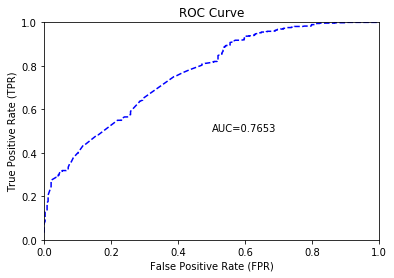

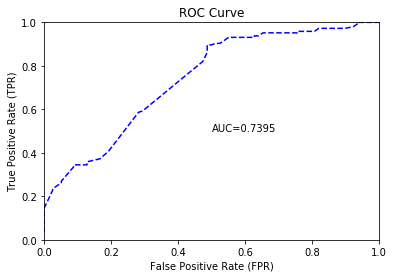

In [55]:
best_xgb_te_perf_train.plot()
best_xgb_te_perf.plot()


In [56]:
best_xgb_te_perf.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47631174325942993: 


,,0,1,Error,Rate
0,0,35.0,43.0,0.5513,(43.0/78.0)
1,1,10.0,135.0,0.069,(10.0/145.0)
2,Total,45.0,178.0,0.2377,(53.0/223.0)


In [57]:
# save the model
best_xgb_te_orig_model_path = h2o.save_model(model=best_xgb_model_te, path="./tmp/saved_model", force=True)
best_xgb_te_orig_model_path

'/home/mike/Repos/CaseStudies/GoHealth/tmp/saved_model/xgboost_grid_te_model_10'

# Use only top features from grid model

In [58]:
xgb_grid_te_subset = H2OGridSearch(model=H2OXGBoostEstimator,
                          grid_id='xgboost_grid_te_subset',
                          hyper_params={
                            'fold_column': 'fold',
                            "ntrees" : [30, 50, 100],
                            "max_depth" : [2, 3, 4],  # [2, 5, 10],
                            "learn_rate" : [0.02, 0.1, 0.3],
                            #"sample_rate" : [0.8, 1.0],
                            "col_sample_rate" : [0.5, 0.8, 1.0]
                          })

x_ = ['fold'] + ['q_total_te', 'q_start_time_clean_te', 'position_to_be_closed_clean_te', 'q_resume_clean_te', 'q_call_3hrs_clean_te']

xgb_grid_te_subset.train(x=x_, y=response_col_name,
                     training_frame=train, #validation_frame=valid,
                     seed=1)

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


In [59]:
xgb_gridperf_te_subset_auc = xgb_grid_te_subset.get_grid(sort_by='auc', decreasing=True)
#xgb_gridperf_te_subset_auc  # shows everything in performance object
xgb_gridperf_te_subset_auc

      col_sample_rate fold_column learn_rate max_depth ntrees  \
0                 0.8        fold       0.02         2    100   
1                 0.5        fold       0.02         3     50   
2                 0.5        fold        0.1         3     30   
3                 0.5        fold       0.02         2    100   
4                 0.5        fold       0.02         2     50   
.. ..             ...         ...        ...       ...    ...   
76                1.0        fold        0.3         2    100   
77                1.0        fold        0.3         4     30   
78                1.0        fold        0.3         4     50   
79                0.5        fold        0.3         2    100   
80                1.0        fold        0.3         4    100   

                          model_ids                 auc  
0   xgboost_grid_te_subset_model_56  0.6825044222304496  
1   xgboost_grid_te_subset_model_37  0.6814245752601917  
2   xgboost_grid_te_subset_model_13  0.681257

In [60]:
best_xgb_model_subset = xgb_gridperf_te_subset_auc.models[0]
best_xgb_model_subset.varimp(True)[:5]

,variable,relative_importance,scaled_importance,percentage
0,q_total_te,1837.720825,1.000000,0.522219
1,q_start_time_clean_te,658.075806,0.358093,0.187003
2,position_to_be_closed_clean_te,649.487488,0.353420,0.184563
3,q_call_3hrs_clean_te,336.585236,0.183154,0.095646
4,q_resume_clean_te,37.192104,0.020238,0.010569


In [61]:
best_xgb_subset_perf = best_xgb_model_subset.model_performance(test)
best_xgb_subset_perf_train = best_xgb_model_subset.model_performance(train)
print('Accuracy(Train/Test):', best_xgb_subset_perf_train.accuracy()[0][0], '/', best_xgb_subset_perf.accuracy()[0][0])
print('AUC(Train/Test):', best_xgb_subset_perf_train.auc(), '/', best_xgb_subset_perf.auc())

Accuracy(Train/Test): 0.47237950563430786 / 0.498759388923645
AUC(Train/Test): 0.7304393434530421 / 0.735499557913351


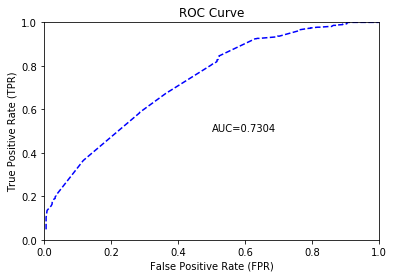

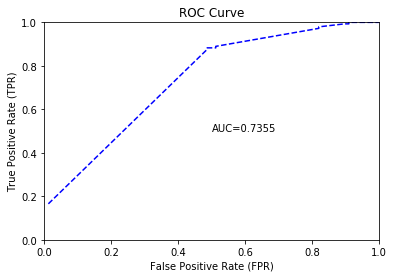

In [62]:
best_xgb_subset_perf_train.plot()
best_xgb_subset_perf.plot()

In [63]:
best_xgb_subset_perf.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.498759388923645: 


,,0,1,Error,Rate
0,0,40.0,38.0,0.4872,(38.0/78.0)
1,1,17.0,128.0,0.1172,(17.0/145.0)
2,Total,57.0,166.0,0.2466,(55.0/223.0)


In [64]:
best_xgb_te_subset_model_path = h2o.save_model(model=best_xgb_subset_perf, path="./tmp/saved_model", force=True)
best_xgb_te_subset_model_path


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.18515568619466322
RMSE: 0.43029720681717565
LogLoss: 0.5543393369453001
Mean Per-Class Error: 0.30221043324491603
AUC: 0.735499557913351
AUCPR: 0.7037259336499044
Gini: 0.47099911582670195

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.498759388923645: 


,,0,1,Error,Rate
0,0,40.0,38.0,0.4872,(38.0/78.0)
1,1,17.0,128.0,0.1172,(17.0/145.0)
2,Total,57.0,166.0,0.2466,(55.0/223.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.498759,0.823151,2.0
1,max f2,0.362555,0.910804,11.0
2,max f0point5,0.498759,0.791100,2.0
3,max accuracy,0.498759,0.753363,2.0
4,max precision,0.831734,0.960000,0.0
5,max recall,0.362555,1.000000,11.0
6,max specificity,0.831734,0.987179,0.0
7,max absolute_mcc,0.498759,0.432487,2.0
8,max min_per_class_accuracy,0.682848,0.512821,1.0
9,max mean_per_class_accuracy,0.498759,0.697790,2.0



Gains/Lift Table: Avg response rate: 65.02 %, avg score: 62.60 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.112108,0.831734,1.476414,1.476414,0.960000,0.831734,0.960000,0.831734,0.165517,0.165517,47.641379,47.641379
1,,2,0.739910,0.682848,1.131478,1.183741,0.735714,0.682848,0.769697,0.705406,0.710345,0.875862,13.147783,18.374086
2,,3,0.919283,0.420329,0.538276,1.057796,0.350000,0.425016,0.687805,0.650696,0.096552,0.972414,-46.172414,5.779647
3,,4,1.000000,0.241779,0.341762,1.000000,0.222222,0.344348,0.650224,0.625968,0.027586,1.000000,-65.823755,0.000000




ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.18515568619466322
RMSE: 0.43029720681717565
LogLoss: 0.5543393369453001
Mean Per-Class Error: 0.30221043324491603
AUC: 0.735499557913351
AUCPR: 0.7037259336499044
Gini: 0.47099911582670195

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.498759388923645: 


,,0,1,Error,Rate
0,0,40.0,38.0,0.4872,(38.0/78.0)
1,1,17.0,128.0,0.1172,(17.0/145.0)
2,Total,57.0,166.0,0.2466,(55.0/223.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.498759,0.823151,2.0
1,max f2,0.362555,0.910804,11.0
2,max f0point5,0.498759,0.791100,2.0
3,max accuracy,0.498759,0.753363,2.0
4,max precision,0.831734,0.960000,0.0
5,max recall,0.362555,1.000000,11.0
6,max specificity,0.831734,0.987179,0.0
7,max absolute_mcc,0.498759,0.432487,2.0
8,max min_per_class_accuracy,0.682848,0.512821,1.0
9,max mean_per_class_accuracy,0.498759,0.697790,2.0



Gains/Lift Table: Avg response rate: 65.02 %, avg score: 62.60 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.112108,0.831734,1.476414,1.476414,0.960000,0.831734,0.960000,0.831734,0.165517,0.165517,47.641379,47.641379
1,,2,0.739910,0.682848,1.131478,1.183741,0.735714,0.682848,0.769697,0.705406,0.710345,0.875862,13.147783,18.374086
2,,3,0.919283,0.420329,0.538276,1.057796,0.350000,0.425016,0.687805,0.650696,0.096552,0.972414,-46.172414,5.779647
3,,4,1.000000,0.241779,0.341762,1.000000,0.222222,0.344348,0.650224,0.625968,0.027586,1.000000,-65.823755,0.000000


H2OTypeError: Argument `model` should be a ModelBase, got H2OBinomialModelMetrics 


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.18515568619466322
RMSE: 0.43029720681717565
LogLoss: 0.5543393369453001
Mean Per-Class Error: 0.30221043324491603
AUC: 0.735499557913351
AUCPR: 0.7037259336499044
Gini: 0.47099911582670195

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.498759388923645: 


,,0,1,Error,Rate
0,0,40.0,38.0,0.4872,(38.0/78.0)
1,1,17.0,128.0,0.1172,(17.0/145.0)
2,Total,57.0,166.0,0.2466,(55.0/223.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.498759,0.823151,2.0
1,max f2,0.362555,0.910804,11.0
2,max f0point5,0.498759,0.791100,2.0
3,max accuracy,0.498759,0.753363,2.0
4,max precision,0.831734,0.960000,0.0
5,max recall,0.362555,1.000000,11.0
6,max specificity,0.831734,0.987179,0.0
7,max absolute_mcc,0.498759,0.432487,2.0
8,max min_per_class_accuracy,0.682848,0.512821,1.0
9,max mean_per_class_accuracy,0.498759,0.697790,2.0



Gains/Lift Table: Avg response rate: 65.02 %, avg score: 62.60 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.112108,0.831734,1.476414,1.476414,0.960000,0.831734,0.960000,0.831734,0.165517,0.165517,47.641379,47.641379
1,,2,0.739910,0.682848,1.131478,1.183741,0.735714,0.682848,0.769697,0.705406,0.710345,0.875862,13.147783,18.374086
2,,3,0.919283,0.420329,0.538276,1.057796,0.350000,0.425016,0.687805,0.650696,0.096552,0.972414,-46.172414,5.779647
3,,4,1.000000,0.241779,0.341762,1.000000,0.222222,0.344348,0.650224,0.625968,0.027586,1.000000,-65.823755,0.000000
